In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


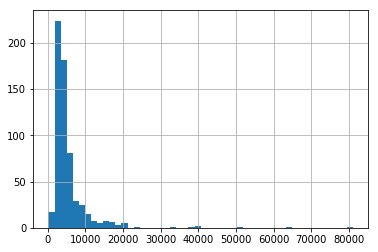

In [165]:
df_train['ApplicantIncome'].hist(bins=50)
plt.show()


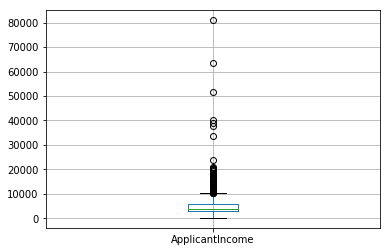

In [166]:
df_train.boxplot(column='ApplicantIncome')
plt.show()

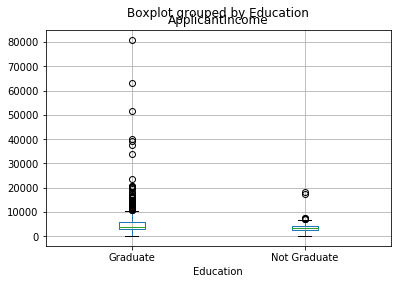

In [167]:
df_train.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

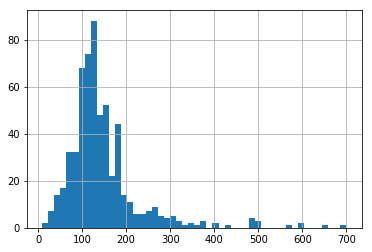

In [168]:
df_train['LoanAmount'].hist(bins=50)
plt.show()

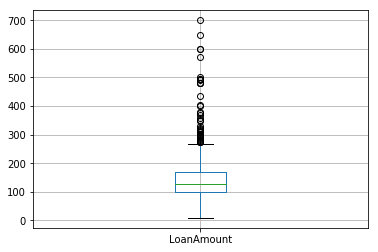

In [169]:
df_train.boxplot(column='LoanAmount')
plt.show()

In [170]:
temp1 = df_train['Credit_History'].value_counts(ascending=True)
temp2 = df_train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print('\nProbility of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


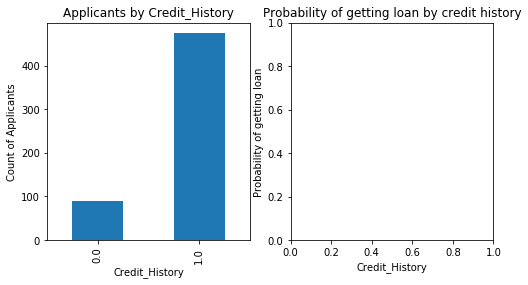

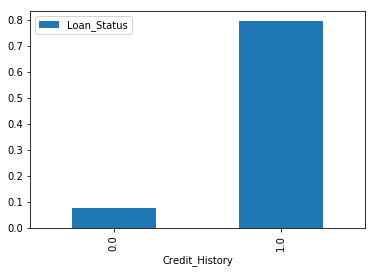

In [171]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
plt.show()

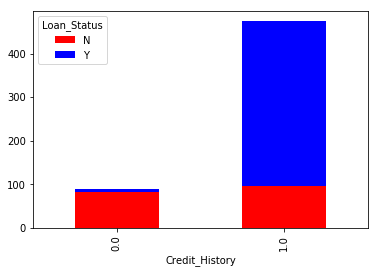

In [172]:
temp3 = pd.crosstab(df_train['Credit_History'], df_train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
plt.show()

In [173]:
df_train.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [174]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)

In [175]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [176]:
 df_train['Self_Employed'].fillna('No',inplace=True)

In [177]:
table = df_train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [178]:

def func(x):
    return table.loc[x['Self_Employed'],x['Education']]


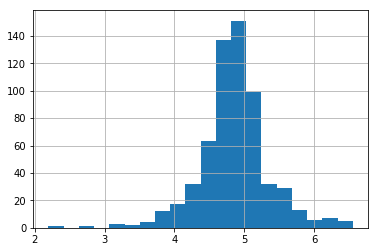

In [179]:
df_train['LoanAmount_log'] = np.log(df_train['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=20)
plt.show()

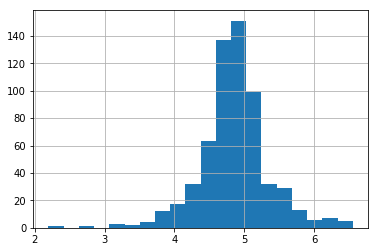

In [180]:
df_train['TotalIncome'] = df_train['ApplicantIncome'] + df_train['CoapplicantIncome']
df_train['TotalIncome_log'] = np.log(df_train['TotalIncome'])
df_train['LoanAmount_log'].hist(bins=20) 
plt.show()

In [181]:
df_train[['Gender','Married','Dependents','Loan_Amount_Term','Credit_History']]

    #Replacing all the NaN values in the Gender Column with Male

df_train['Gender'].fillna('Male',inplace=True)

    #Replacing all the NaN values in the Married Column with Yes
    
df_train['Married'].fillna('Yes',inplace=True)
    
    #Replacing all the NaN values in the Dependents column with 0
    
df_train['Dependents'].fillna('0',inplace=True)

    #Replacing all the NaN values in the Loan Amount Term with 360.0
    
df_train['Loan_Amount_Term'].fillna('360.0',inplace=True)

    #Replacing all the NaN values in the Credit History with 1

df_train['Credit_History'].fillna('0',inplace=True)

gender=df_train['Gender']
gender.replace(('Male', 'Female'), (1, 0), inplace=True)


In [184]:
married=df_train['Married']
married.replace(('Yes', 'No'), (1, 0), inplace=True)

In [185]:

education=df_train['Education']
education.replace(('Graduate', 'Not Graduate'), (1, 0), inplace=True)

In [187]:
employed=df_train['Self_Employed']
employed.replace(('Yes','No'),(1,0),inplace=True)

In [209]:
df_train.drop('Property_Area',axis=1)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360,1,Y,4.986426,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360,1,N,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360,1,Y,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360,1,Y,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360,1,Y,4.948760,6000.0,8.699515
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360,1,Y,5.587249,9613.0,9.170872
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360,1,Y,4.553877,3849.0,8.255569
7,LP001014,1,1,3+,1,0,3036,2504.0,158.000000,360,0,N,5.062595,5540.0,8.619750
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360,1,Y,5.123964,5532.0,8.618305
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360,1,N,5.855072,23809.0,10.077819


In [193]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])

In [203]:
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df_train,predictor_var,outcome_var)

Accuracy : 77.199%
Cross-Validation Score : 76.553%


In [205]:
# importing the requests library
import requests
 
# api-endpoint
URL = "https://api.typeform.com/v1/form/QbowCj?key=514ee8047aa69f423edceda7ad3eac553977c7af&order_by[]=date_submit,desc"
URL2=  "https://api.typeform.com/v1/form/bPph83?key=514ee8047aa69f423edceda7ad3eac553977c7af&order_by[]=date_submit,desc"
# location given here
location = "SNU"
 
# defining a params dict for the parameters to be sent to the API
PARAMS = {'address':location}
 
# sending get request and saving the response as response object
r = requests.get(url = URL2, params = PARAMS)
 
# extracting data in json format
data = r.json()
print(data['responses'][0]['answers'])


{'list_S6tNZqSySsZy_choice': 'Male', 'list_Ixqf6US914v8_choice': '45 to 54', 'list_EDggbqHnxBvA_choice': 'Single (never married)', 'rating_pbywOcqF1neq': '1', 'list_g8LmmTWo1ANf_choice': 'Less than High School', 'list_fdRHW9HaAC3x_choice': 'Worker', 'list_rINVdUOHHrNM_choice': '$2000 - $4000', 'list_m4VyqMtjxRDa_choice': '$2000 - $4000', 'list_sXNDsURYRewj_choice': '20 years'}


In [206]:
# sending get request and saving the response as response object
r2 = requests.get(url = URL, params = PARAMS)
 
# extracting data in json format
data2 = r2.json()
print(data2['responses'][0]['answers'])


{'textfield_Tb2SnJGens0V': '1000', 'textfield_uo4LVTh5RCpe': '1000', 'textfield_LDO385WDEOgu': '500', 'textfield_vZiFD1jwLGC2': '600', 'list_To4Sh8lFvrwd_choice': 'Semi urban', 'textfield_KHgXLSm7FUVg': '100000', 'textfield_RIv7hk0xgGkw': '360', 'yesno_rDlmQ0ZKws4N': '0', 'textfield_urxBAVxHIBSs': 'car', 'textfield_ff8F7rNWQ9QF': '2500'}


In [210]:
if(data['responses'][0]['answers']['list_EDggbqHnxBvA_choice'][0]=="S"):
    married = 0
else:
    married = 1
if(data['responses'][0]['answers']['list_S6tNZqSySsZy_choice'][0]=="M"):
    gender = 1
else:
    gender = 0
    
dependents=data['responses'][0]['answers']['rating_pbywOcqF1neq']

if(data['responses'][0]['answers']['list_g8LmmTWo1ANf_choice'][0]=='H' or data['responses'][0]['answers']['list_fdRHW9HaAC3x_choice'][0]=='L'):
    education=0
else:
    education=1
    
if(data['responses'][0]['answers']['list_fdRHW9HaAC3x_choice'][0]=='S'):
    employed=1
else:
    employed=0
    
income=data['responses'][0]['answers']['list_rINVdUOHHrNM_choice']
if(income=="Under $2000"):
    income = 2000 
elif(income=="$2000 - $4000"):
    income = 3000
elif(income=="$4000 - $5000"):
    income = 4500
elif(income=="$5000 - $7000"):
    income = 6000
elif(income=="$7000 - $8000"):
    income = 7500
elif(income=="$8000 - $9000"):
    income = 8500
elif(income=="$9000 - $10000"):
    income = 9500
else:
    income = 12000
    
income2=data['responses'][0]['answers']['list_m4VyqMtjxRDa_choice']
if(income2=="Under $2000"):
    income2 = 2000
elif(income2=="$2000 - $4000"):
    income2 = 3000
elif(income2=="$4000 - $5000"):
    income2 = 4500
elif(income2=="$5000 - $7000"):
    income2 = 6000
elif(income2=="$7000 - $8000"):
    income2 = 7500
elif(income2=="$8000 - $9000"):
    income2 = 8500
elif(income2=="$9000 - $10000"):
    income2 = 9500
else:
    income2 = 12000    
    
property=data2['responses'][0]['answers']['list_To4Sh8lFvrwd_choice'][0]
if(property=='U'):
    property=2 
elif(property=='S'):
    property=1
else:
    property=0
    

term=data2['responses'][0]['answers']['textfield_RIv7hk0xgGkw']
        
amount=int(data2['responses'][0]['answers']['textfield_KHgXLSm7FUVg'])
amount=amount/1000

history=int(data2['responses'][0]['answers']['yesno_rDlmQ0ZKws4N'])
total_income=income+income2


df_train.append({'tGender':gender, 'Married': married, 'Dependents':dependents,'Education':education,'Self_Employed':employed,'ApplicantIncome':income,'CoapplicantIncome':income2,'Property_Area':property,'Loan_Amount_Term':term,'LoanAmount':amount,'Credit_History':history,'Total_Income':total_income}, ignore_index=True)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Total_Income,tGender
0,LP001002,1.0,0,0,1,0,5849,0.0,146.412162,360,1,Urban,Y,4.986426,5849.0,8.674026,NaN,NaN
1,LP001003,1.0,1,1,1,0,4583,1508.0,128.000000,360,1,Rural,N,4.852030,6091.0,8.714568,NaN,NaN
2,LP001005,1.0,1,0,1,1,3000,0.0,66.000000,360,1,Urban,Y,4.189655,3000.0,8.006368,NaN,NaN
3,LP001006,1.0,1,0,0,0,2583,2358.0,120.000000,360,1,Urban,Y,4.787492,4941.0,8.505323,NaN,NaN
4,LP001008,1.0,0,0,1,0,6000,0.0,141.000000,360,1,Urban,Y,4.948760,6000.0,8.699515,NaN,NaN
5,LP001011,1.0,1,2,1,1,5417,4196.0,267.000000,360,1,Urban,Y,5.587249,9613.0,9.170872,NaN,NaN
6,LP001013,1.0,1,0,0,0,2333,1516.0,95.000000,360,1,Urban,Y,4.553877,3849.0,8.255569,NaN,NaN
7,LP001014,1.0,1,3+,1,0,3036,2504.0,158.000000,360,0,Semiurban,N,5.062595,5540.0,8.619750,NaN,NaN
8,LP001018,1.0,1,2,1,0,4006,1526.0,168.000000,360,1,Urban,Y,5.123964,5532.0,8.618305,NaN,NaN
9,LP001020,1.0,1,1,1,0,12841,10968.0,349.000000,360,1,Semiurban,N,5.855072,23809.0,10.077819,NaN,NaN


In [212]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360,1,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360,1,Rural,N,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360,1,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360,1,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360,1,Urban,Y,4.948760,6000.0,8.699515
5,LP001011,1,1,2,1,1,5417,4196.0,267.000000,360,1,Urban,Y,5.587249,9613.0,9.170872
6,LP001013,1,1,0,0,0,2333,1516.0,95.000000,360,1,Urban,Y,4.553877,3849.0,8.255569
7,LP001014,1,1,3+,1,0,3036,2504.0,158.000000,360,0,Semiurban,N,5.062595,5540.0,8.619750
8,LP001018,1,1,2,1,0,4006,1526.0,168.000000,360,1,Urban,Y,5.123964,5532.0,8.618305
9,LP001020,1,1,1,1,0,12841,10968.0,349.000000,360,1,Semiurban,N,5.855072,23809.0,10.077819
